# Pythorch Workflow

Lets explore a Pythorch end-to-end workflow!!

Author: Alejandro Meza

In [ ]:
what_we_are_covering={1:"data prepare and loading",
                      2:"build model",
                      3:"fit the model to the data",
                      4:"make predictions (inference)",
                      5:"saving and load the model",
                      6:"putting it all together"}
what_we_are_covering

{1: 'data prepare and loading',
 2: 'build model',
 3: 'fit the model to the data',
 4: 'make predictions (inference)',
 5: 'saving and load the model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of Pythorch's builiding blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

## 1. Data (Preparing data and loading to the model )

Data can be almost anything:

- Excel
- Images of any kind
- Videos
- Audio like songs or podcasts
- DNA
- Text

Machine learning is a game of 2 parts:
- get data into numerical representation
- build a model to learn patterns about that numbers

In [ ]:
#lets create some known data using the linear regression formula Y=a+bX !!


#1)Create the data
weight=0.7  #b
bias=0.3    #a

#create rangte of numbers
start=0
end=1
step=0.02
#define a tensor
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

We are gonna build a model, that, having some values of X, is able to associate which value of Y should be have.

## Split data into training and test set

Normally, we have 3 datasets:

- Training set: course materials (60-80%)
- Validation set: mock sets  -> tune model patterns  (10-20%)
- Test: final exam   -> see if the model is ready for the wild --> generalization (10-20%)

Generalization: ability of ML model to perform well on data it has not seen before.

In [ ]:
#lets create a training and test data
train_split=int(0.7*len(X)) #define the proportions
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(35, 35, 15, 15)

In [ ]:
#lets visualize the set of data in a better way
def plot_predictions(train_data=X_train,
                  train_labels=y_train,
                  test_data=X_test,
                  test_labels=y_test,
                  predictions=None):

  plt.figure(figsize=(6,6))

  #train data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  #prediction data in red
  plt.scatter(test_data,test_labels,c="r",s=4,label="Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="g",s=4,label="Predictions")

  plt.legend(prop={"size":14})

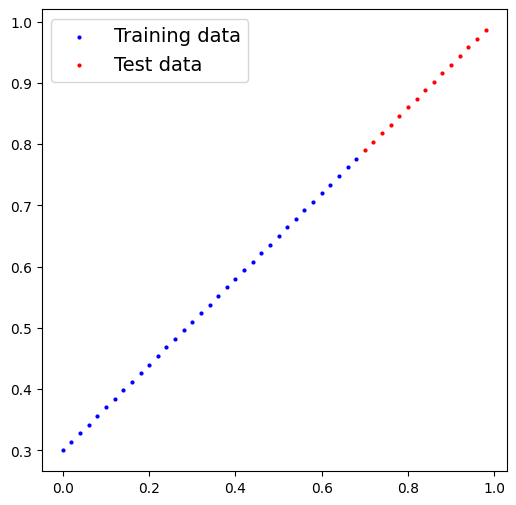

In [ ]:
plot_predictions(X_train,
                  y_train,
                  X_test,
                  y_test)

##Lets build a regression model!!

Some important concepts:
- nn.Parameter: paremeters are TENSOR subclasses, that have a very special property. They are automatically added to the module parameters list, and will appear in the parameter() iterator.
-requires_grad: if the parameter requires gradient to improve its value over iterations.

The **goal** of the implementation, is to start with random values as weight, and bias, and while looking at the training set, find patters, and improve little by little the model performance to be able to predict over unknown data.

How to do so? Through 2 main algorithms:
- gradient descent
- back propagation

In [ ]:
#create a linear regression class
from torch import nn

#your model always should subclass NN.module: contains all the building blocks for neural networks

class LinearRegressionModel(nn.Module): #almost everything in pythorch inheriths from that module
  def __init__(self):
    super().__init__()
    #initialize the parameters: define variables, layers, hard-codes values ...
    self.weights=nn.Parameter(torch.randn(1, #only create a random weight
                                          requires_grad=True, #tell that we can upgrade by gradient descent--> track gradient
                                          dtype=torch.float))

    self.bias=nn.Parameter(torch.randn(1, #create a random bias value
                                       requires_grad=True, #tell that we can upgrade by gradient descent--> track gradient
                                       dtype=torch.float))

  #any subclass of nn.Module requires a forward method/forward compuation method to the model
  #forward method: define the input parameter as tensor X, and the output as a Tensor
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights*x+self.bias

###Understanding nn.Module and Parameter Tracking


Inheritance from nn.Module:

When you define a class that inherits from nn.Module, as in class LinearRegressionModel(nn.Module):, you are leveraging PyTorch's neural network building blocks.
nn.Module provides functionalities that facilitate parameter management, tracking of gradients, and integration into PyTorch's computational graph.
Parameter Initialization:

Within your __init__ method, parameters like self.weights and self.bias are defined as instances of nn.Parameter. This is a subclass of torch.Tensor specifically designed to be a model parameter.
By setting requires_grad=True, you explicitly tell PyTorch to compute gradients for these parameters during backpropagation.
Forward Method:

The forward method is where you define the computation that your model performs on input data (x). In your case, it's a simple linear transformation (self.weights * x + self.bias).
Gradient Tracking Mechanism:

When you call methods like loss.backward() during training, PyTorch traces back through the operations that produced the loss, calculating gradients for all tensors that have requires_grad=True.
Parameters defined as nn.Parameter within an nn.Module subclass are automatically registered to the model and tracked by PyTorch. This registration ensures that their gradients are computed and updated correctly during training.
No Context Manager Needed:

PyTorch manages gradient tracking internally without needing an explicit context manager for each parameter. When you define parameters as nn.Parameter and specify requires_grad=True, PyTorch handles the gradient computation seamlessly.
The context of parameter tracking and gradient computation is managed globally within PyTorch's computational graph, which dynamically tracks dependencies and gradients during the forward and backward passes.

###Undertanding Pythorch computation graph

**What is a Computational Graph?**


A computational graph is a way to visualize and organize the sequence of mathematical operations that occur in a computational process. In PyTorch, computational graphs are dynamically created during the execution of your program. They represent the flow of data and operations from input tensors through intermediate calculations to output tensors.

**Key Components of PyTorch Computational Graph:**

Nodes:

Nodes in the computational graph represent operations or calculations. These operations can be tensor operations (like addition, multiplication), function calls (like activations or loss functions), or even control flow constructs (like loops or conditionals).
Edges:

Edges in the graph represent dependencies between nodes. They indicate how the output of one operation flows into the input of another operation. Essentially, edges denote the flow of data through the computation.
Variables:

In PyTorch, tensors that require gradients (requires_grad=True) are marked as variables in the computational graph. These variables are nodes in the graph that store data (tensors) and gradients (for backpropagation).
Computational Flow:

When you perform operations on tensors with requires_grad=True, PyTorch automatically tracks these operations and constructs a computational graph dynamically. This graph records the sequence of operations that were applied to compute the final output from the input.

### Pythorch model building essentials

- torch.nn --> contains all of the buildings for neural networks
- toch.nn.Parameter --> parameters that our model should learn
- torch.nn.Module --> the base class for all neural network modules
- torch.optim --> optimizer that helps with gradient descent --> optimize random values
- def forward() --> all nn.Module subclasses require you to overrride forward computation.
- torch.utils.data.Dataset --> represents a map between key (label) and sample (feautures) pair of your data. Such as images and their labels.
- torch.utils.data.DataLoader --> creates a Python iterable over a torch DataSet (allows to iterate over data)

### Checking the contents of our Python model

Now, that we have created a model, let's see what is inside...

So we can check our model parameters, or what's inside our model using .parameters().

In [ ]:
# Create a random seed

#with, this, the randomness of the weight creation has gone
torch.manual_seed(42)

#create an instance of the model: subclass of the nn.Module
model_0=LinearRegressionModel()

#check out the parameters of the model
print(list(model_0.parameters()))

#so, our goal is to improve the random values to the target ones! (weight=0.7,bias=0.3)
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


### Making predictions using 'torch.inference_mode()'

To check out model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'.

When we pass data through our model, its going to run through the forward method.

In [ ]:
#make prediction with the model
with torch.inference_mode(): #context manager:remove gradient tracking --> y_preds=model_0(X_test) --> track gradient, so its slower
  y_preds=model_0(X_test)
print(y_preds)

tensor([[0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914],
        [0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


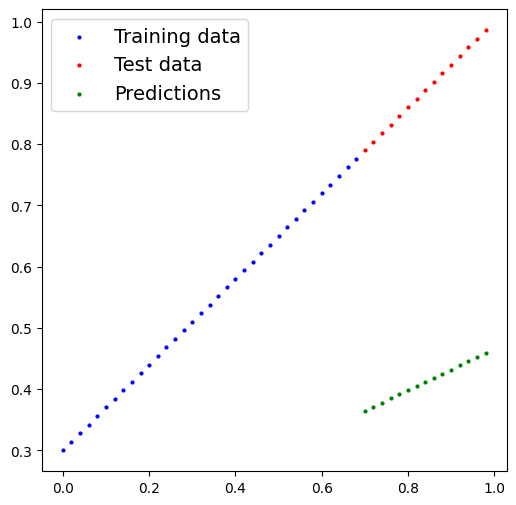

In [ ]:
#check the accuracy
plot_predictions(predictions=y_preds)

##3. Train a model

The main idea for a model is to move from **unknown** parameters (may be random), to some **known** parameters.  

Or in other words, to move from a poor representation of the data to a better representation of the data.

Onw way to measure to meassure our model performance, is to use a loss function.

* Note: Loss function may also be called cost function or criterion, in different areas. For our case, we are going to refer to it as a loss function.

* **Loss function:** A function to meausure the quality of your model predictions.

* **Optimizer**: Take into account the loss of a model and adjusts the model's parameters (weight & bias). Inside the optimizer we have 2 things to optimize:
  
  -params: the model parameters

  -lr: learning rate

  **learning rate scheduling**: starts with a big value, and then make it smaller and smaller.

And specifically for Pythorch we need:
- training loop
- test loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

We are gonna use **L1 loss**, which meassures the mean absolute error between the input X and the output Y. So basically, **MAE**.

In [ ]:
#set up a loss function
loss_fn = nn.L1Loss()

#set up an optimizer: optimize our parameters
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01) #learning rate=0.01 = possibly the most important hyperparameter

## Training loop and evaluation loop intuition

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (foward()) in our model
2. Calculate the loss of the model (compare forward pass predictions to ground thruth labels)
3. Optimizer zero grad
4. Loss backward -move backward through the network to calculate the gradient of each parameter of the model-. (**backpropagation**)
5. Optimizer step  -use the optimizer to adjust our model's parameters to reduce the loss-. (**gradient descent**)

In [ ]:
X_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# An epoch is one loop through the data... -this is a hyperparameters because we have defined it-
epochs = 200

#tracking values
epoch_count=[]
loss_values=[]
test_loss_values=[]

### Training
#0.Loop through the data
for epoch in range(epochs):
  #set the model to training mode/ model.eval() in the case you want to predict new results
  #set the parameters to requiere gradients
  model_0.train()
  #1.Forward pass
  y_pred = model_0(X_train)

  #2.Calculate the loss: compare y_pred with y_train
  loss = loss_fn(y_pred,y_train)

  #3.Optimizer zero grad
  optimizer.zero_grad()

  #4.Loss backward
  loss.backward()

  #5.Optimizer step
  #by defualt the optimizer changes will accumulate through the loop... we have to zero them above in step 3
  optimizer.step()

  #check parameters new values
  #print(model_0.state_dict())

  ###TESTING after finish the training iteration (EPOCH)
  model_0.eval() #turns off different settings in the model to not needed for evaluation
  with torch.inference_mode(): # turns off gradient tracking
    #1.Forward propagation: obtain inference
    test_pred=model_0(X_test)

    #2.Calculate the loss of the model
    test_loss=loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    #epoch and loss of the iteration
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.29471588134765625 | Test loss: 0.46351468563079834
Epoch: 10 | Loss: 0.18315580487251282 | Test loss: 0.3349546492099762
Epoch: 20 | Loss: 0.07850800454616547 | Test loss: 0.21224336326122284
Epoch: 30 | Loss: 0.04853598028421402 | Test loss: 0.14812307059764862
Epoch: 40 | Loss: 0.04299893230199814 | Test loss: 0.1225595772266388
Epoch: 50 | Loss: 0.04006887227296829 | Test loss: 0.1108100414276123
Epoch: 60 | Loss: 0.03729530796408653 | Test loss: 0.10128359496593475
Epoch: 70 | Loss: 0.034567978233098984 | Test loss: 0.09398991614580154
Epoch: 80 | Loss: 0.03183940425515175 | Test loss: 0.0866963192820549
Epoch: 90 | Loss: 0.029115844517946243 | Test loss: 0.07865851372480392
Epoch: 100 | Loss: 0.026395238935947418 | Test loss: 0.07136490941047668
Epoch: 110 | Loss: 0.023672932758927345 | Test loss: 0.06407131999731064
Epoch: 120 | Loss: 0.020944364368915558 | Test loss: 0.05677773430943489
Epoch: 130 | Loss: 0.018215805292129517 | Test loss: 0.048739925026893616


In [ ]:
#In order to check the status of the parameters!!
model_0.state_dict()

OrderedDict([('weights', tensor([0.6942])), ('bias', tensor([0.2985]))])

After 100 epochs, we obtained a trained loss of 0.07!!

**Notice**: the real params are --> weight 0.7, bias=0.3

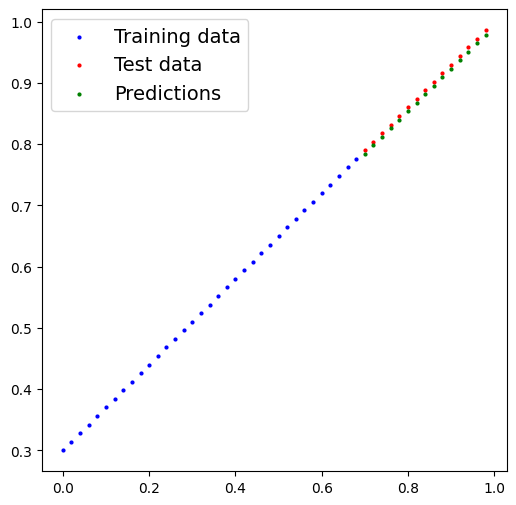

In [ ]:
with torch.inference_mode(): #context manager:remove gradient tracking --> y_preds=model_0(X_test) --> track gradient, so its slower
  y_preds=model_0(X_test)

plot_predictions(predictions=y_preds)

**IMPORTANT**

When you call **loss.backward()**, PyTorch computes the gradient of the loss function (loss) with respect to all tensors that have requires_grad=True.
These gradients are essentially the partial derivatives of the loss with respect to each parameter of the model. They indicate the direction and magnitude of change needed in each parameter to decrease the loss.

So basically, that parameters are already being tracked in the Pythorch computational graph.

### Print loss curves

In [ ]:
#to use plot function, we have to convert the values to numpy arrays
loss_values = torch.tensor(loss_values).numpy()
test_loss_values = torch.tensor(test_loss_values).numpy()

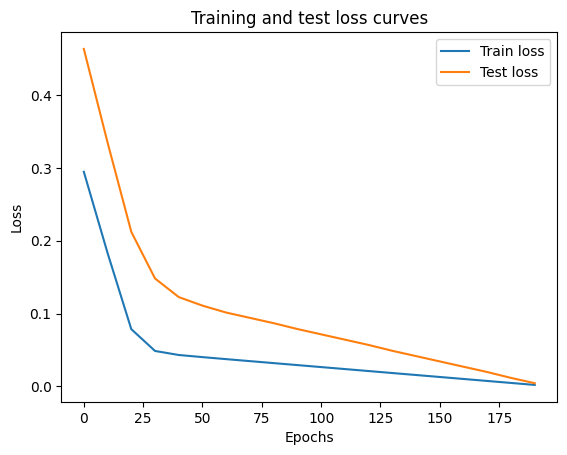

In [ ]:
#plot loss curve
plt.plot(epoch_count,loss_values,label="Train loss")
#plot test loss curve
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### Save the model

In order to not re-run everything, and save the trained model it's very important to save the model!

There are 3 models to save/load models in Python.

**1**. 'torch.save()': save as a serialized object -pickle format-

**2.** torch.load: allows you to load the saved Pythorch object -deserialized saved object-.

**3.** torch.nn.Module.load_state_dict(): this allows to load a model's saved state dictionary.

In [ ]:
model_0.state_dict() #our model has 2 parameters

OrderedDict([('weights', tensor([0.6942])), ('bias', tensor([0.2985]))])

In [ ]:
#saving our pythorch model
from pathlib import Path

#1.Create models directory
model_path = Path("models")
model_path.mkdir(parents=True,exist_ok=True)

#2.Create model save: extension --> .pth
model_name = 'linear_regresion.pth'
model_save_path = model_path/model_name

#3.Save the model state dict
print(f'SAVING THE MODEL: {model_save_path}')
#TORCH.SAVE()
torch.save(obj=model_0.state_dict(),
           f=model_save_path)


SAVING THE MODEL: models/linear_regresion.pth


In [ ]:
model_save_path

PosixPath('models/linear_regresion.pth')

## Load the model

In other words, load the model's weight.

Basically, we are going to create a new instance of the model, and load the saved 'state_dict()'

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1550 Jul 12 13:51 linear_regresion.pth


In [ ]:
#Create a new instance of the model
loaded_model_0=LinearRegressionModel()

#Load the saved state_dict(): load the trained weights in the model
model_save_path=model_save_path
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6942])), ('bias', tensor([0.2985]))])

In [ ]:
#Make some predictions with our loaded model
loaded_model_0.eval() #define evaluation mode, since we are not training the model
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.7845],
        [0.7983],
        [0.8122],
        [0.8261],
        [0.8400],
        [0.8539],
        [0.8678],
        [0.8816],
        [0.8955],
        [0.9094],
        [0.9233],
        [0.9372],
        [0.9511],
        [0.9650],
        [0.9788]])

In [ ]:
#compare load model, and the previous model results
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

Let's go back and see it all in one place.

In [ ]:
# Import pythorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pythorch version
torch.__version__

'2.3.0+cu121'

Creaete device-agnostic code.

This means, if we have got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will be running on the CPU.


In [ ]:
#set-up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

Using device: cuda


# Create some data using linear regression

In [ ]:
#define parameters
weight = 0.7
bias = 0.3

#create a range of values
start = 0
end = 1
step = 0.02

#create a tensor of random values
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:5],y[:5]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# Split the data
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

# Building the linear model!!

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):

  def __init__(self):
    super().__init__()
    #sometimes there are layers with that parameters already to be used --> use nn.Linear
    #in this case: input_values = 1 , output_values=1 --> linear layer implements linear regression formula
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#Set the manual seed for reproducibility
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

We can see that there are **parameters** that were initialized by default using the torch layer!!

In [ ]:
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#set the model to run on the gpu
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

# Train the created model

For training we need:
* Loss function
* Optimizer
* Training loop
* Test loop

In [ ]:
#set up loss function
loss_fn = nn.L1Loss()

#set up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
#put data on the target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

In [ ]:
#define the training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):

  #----------------------train loop--------------
  model_1.train()

  #1.forward pass
  y_pred = model_1(X_train)

  #2.calculate the loss of the model
  train_loss = loss_fn(y_pred,y_train)

  #3.optimizer zero grad
  optimizer.zero_grad()

  #4.loss backward
  train_loss.backward()

  #5.optimizer step
  optimizer.step()

  #-----------------test loop-------------------
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Train loss: {train_loss} | Test loss: {test_loss}')



Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Train loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Train loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Train loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Train loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Train loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Train loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Train loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Train loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Train loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Train loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

Our defined values were: 0.7 and 0.3 !!

### Making and evaluating predictions

In [ ]:
#put the model in evaluation mode
model_1.eval()

#put the model in inference mode
with torch.inference_mode():
  y_preds = model_1(X_test)

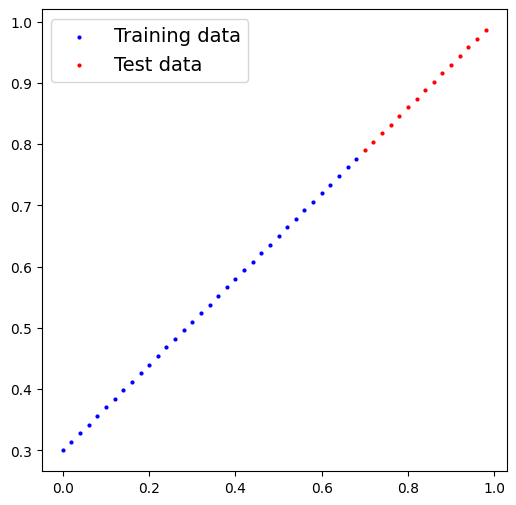

In [ ]:
#check the model predictions visually
plot_predictions()

### Saving and loading the model

In [ ]:
from pathlib import Path

#1. Create model directorie
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME = "pythorch_model_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
#Load a PyTorch model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
loaded_model_1.to(device)
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

In [ ]:
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')